DATA PREPROCESSING

In [55]:
# Libraries for handling numeric computation and dataframes
import pandas as pd
import numpy as np
# Libraries for statistical plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [56]:
dataset=pd.read_csv('Uber_data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product Type          551 non-null    object 
 2   Trip or Order Status  554 non-null    object 
 3   Request Time          554 non-null    object 
 4   Begin Trip Time       554 non-null    object 
 5   Begin Trip Lat        525 non-null    float64
 6   Begin Trip Lng        525 non-null    float64
 7   Dropoff Time          554 non-null    object 
 8   Dropoff Lat           525 non-null    float64
 9   Dropoff Lng           525 non-null    float64
 10  Distance (miles)      554 non-null    float64
 11  Fare Amount           554 non-null    float64
 12  Fare Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


In [57]:
#replace column name spaces
def replace_spaces() :
    # remove special character
    dataset.columns = dataset.columns.str.replace(' ', '_')

replace_spaces()
dataset.rename(columns = {'Distance_(miles)':'Distance'}, inplace = True)
dataset['Distance'] = dataset['Distance'].astype(float, errors = 'raise')




In [58]:
dataset.info()
dataset.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554 entries, 0 to 553
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   City                  554 non-null    int64  
 1   Product_Type          551 non-null    object 
 2   Trip_or_Order_Status  554 non-null    object 
 3   Request_Time          554 non-null    object 
 4   Begin_Trip_Time       554 non-null    object 
 5   Begin_Trip_Lat        525 non-null    float64
 6   Begin_Trip_Lng        525 non-null    float64
 7   Dropoff_Time          554 non-null    object 
 8   Dropoff_Lat           525 non-null    float64
 9   Dropoff_Lng           525 non-null    float64
 10  Distance              554 non-null    float64
 11  Fare_Amount           554 non-null    float64
 12  Fare_Currency         551 non-null    object 
dtypes: float64(6), int64(1), object(6)
memory usage: 56.4+ KB


(554, 13)

In [59]:
#check the null values in the dataset
dataset.isnull().sum()


City                     0
Product_Type             3
Trip_or_Order_Status     0
Request_Time             0
Begin_Trip_Time          0
Begin_Trip_Lat          29
Begin_Trip_Lng          29
Dropoff_Time             0
Dropoff_Lat             29
Dropoff_Lng             29
Distance                 0
Fare_Amount              0
Fare_Currency            3
dtype: int64

In [60]:
#deleting those rows whose number of nulls is more than 50% 
dataset=dataset.dropna(axis=1,thresh=dataset.shape[0]*0.2,how='all')
#dataset.shape

In [61]:
# Checking categories in product_type column
print(dataset.Product_Type.value_counts())
# Categories reclassification
product_mapping = {'UberX':'UberX','uberX':'UberX','uberX VIP':'UberX','VIP':'UberX','POOL':'Pool','POOL: MATCHED':'Pool','UberBLACK': 'Black',
                   'uberx':'UberX','uberPOOL':'Pool','uberPOOL: MATCHED':'Pool','Pool: MATCHED':'Pool'}
# New categories replacement
dataset['Product_Type'].replace(product_mapping, inplace=True)
# Checking new categories in product_type column
print(dataset.Product_Type.value_counts())


UberX                   169
uberX                   144
uberX VIP                81
VIP                      71
POOL                     36
Pool                     12
UberEATS Marketplace     10
POOL: MATCHED             8
uberPOOL: MATCHED         5
uberPOOL                  5
Pool: MATCHED             4
Black                     3
Juntos                    1
UberBLACK                 1
uberx                     1
Name: Product_Type, dtype: int64
UberX                   466
Pool                     70
UberEATS Marketplace     10
Black                     4
Juntos                    1
Name: Product_Type, dtype: int64


In [62]:
#since most review is around uber rides
dataset = dataset[dataset.Product_Type!='UberEATS Marketplace']

In [63]:
# Library for manipulating dates and times
from datetime import datetime
from datetime import timedelta
# Function to convert features to datetime
def date_convertion(df, cols):
  for col in cols:
   df[col] = df[col].apply(lambda x: x.replace(' +0000 UTC', ''))
   df[col] = pd.to_datetime(df[col])
   print(df[col])
  return df

# Applying date_convertion function to date features 
dataset = date_convertion(dataset, ['Request_Time', 'Begin_Trip_Time', 'Dropoff_Time'])

0     2021-01-13 22:06:46
1     2021-01-13 20:21:05
2     2021-01-03 00:23:22
3     2020-12-11 23:16:33
4     2020-12-11 00:35:46
              ...        
549   2016-06-22 11:07:02
550   2016-04-07 00:30:46
551   2016-04-06 21:16:52
552   2016-04-06 21:12:03
553   2015-12-17 23:52:50
Name: Request_Time, Length: 544, dtype: datetime64[ns]
0     2021-01-13 22:11:10
1     2021-01-13 20:27:29
2     2021-01-03 00:33:00
3     2020-12-11 23:27:32
4     2020-12-11 00:46:46
              ...        
549   2016-06-22 11:14:17
550   2016-04-07 00:35:23
551   2016-04-06 21:20:44
552   1970-01-01 00:00:00
553   2015-12-18 00:01:01
Name: Begin_Trip_Time, Length: 544, dtype: datetime64[ns]
0     2021-01-13 22:29:13
1     2021-01-13 20:54:50
2     2021-01-03 00:50:56
3     2020-12-12 00:32:47
4     2020-12-11 00:57:57
              ...        
549   2016-06-22 11:24:28
550   2016-04-07 00:50:14
551   2016-04-06 21:41:30
552   1970-01-01 00:00:00
553   1970-01-01 00:00:00
Name: Dropoff_Time, Length: 5

In [64]:
#splitting rides into dates, months,years
dataset['year'] = dataset.Request_Time .map(lambda x: datetime.strftime(x,"%Y"))
dataset['month'] = dataset.Request_Time .map(lambda x: datetime.strftime(x,"%b"))
dataset['weekday'] = dataset.Request_Time .map(lambda x: datetime.strftime(x,"%a"))
dataset['time'] = dataset.Request_Time .map(lambda x: datetime.strftime(x,"%H:%M"))

dataset.head()

,City,Product_Type,Trip_or_Order_Status,Request_Time,Begin_Trip_Time,Begin_Trip_Lat,Begin_Trip_Lng,Dropoff_Time,Dropoff_Lat,Dropoff_Lng,Distance,Fare_Amount,Fare_Currency,year,month,weekday,time
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,Jan,Wed,20:21
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL,2021,Jan,Sun,00:23
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL,2020,Dec,Fri,23:16
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL,2020,Dec,Fri,00:35


FEATURE ENGINEERING

In [65]:
#CONVERTING AND ROUNDING OFF
x=dataset.Distance
dataset['distance_km'] = round(x*1.60934,2)
print(dataset['distance_km'])
dataset['amount_km'] = round(dataset.Fare_Amount  /dataset.distance_km,2)
dataset.head()

0       7.79
1       8.55
2       9.50
3      31.77
4       4.09
       ...  
549     3.54
550     6.57
551     5.55
552     0.00
553     0.00
Name: distance_km, Length: 544, dtype: float64


,City,Product_Type,Trip_or_Order_Status,Request_Time,Begin_Trip_Time,Begin_Trip_Lat,Begin_Trip_Lng,Dropoff_Time,Dropoff_Lat,Dropoff_Lng,Distance,Fare_Amount,Fare_Currency,year,month,weekday,time,distance_km,amount_km
0,458,Black,COMPLETED,2021-01-13 22:06:46,2021-01-13 22:11:10,-23.599752,-46.715954,2021-01-13 22:29:13,-23.559359,-46.666542,4.84,29.63,BRL,2021,Jan,Wed,22:06,7.79,3.80
1,458,UberX,COMPLETED,2021-01-13 20:21:05,2021-01-13 20:27:29,-23.559298,-46.666454,2021-01-13 20:54:50,-23.599585,-46.715717,5.31,20.86,BRL,2021,Jan,Wed,20:21,8.55,2.44
2,458,UberX,COMPLETED,2021-01-03 00:23:22,2021-01-03 00:33:00,-23.626593,-46.659410,2021-01-03 00:50:56,-23.559273,-46.666595,5.90,34.23,BRL,2021,Jan,Sun,00:23,9.50,3.60
3,458,UberX,COMPLETED,2020-12-11 23:16:33,2020-12-11 23:27:32,-23.559410,-46.666435,2020-12-12 00:32:47,-23.425755,-46.481190,19.74,58.77,BRL,2020,Dec,Fri,23:16,31.77,1.85
4,458,UberX,COMPLETED,2020-12-11 00:35:46,2020-12-11 00:46:46,-23.584846,-46.663590,2020-12-11 00:57:57,-23.559261,-46.666510,2.54,12.63,BRL,2020,Dec,Fri,00:35,4.09,3.09


In [66]:
#calculating time in minutes
dataset['request_lead_time'] = dataset.Begin_Trip_Time  -dataset.Request_Time 
dataset['request_lead_time'] = dataset['request_lead_time'].apply(lambda x: round(x.total_seconds()/60,1))

In [67]:
#calculating time in minutes
dataset['trip_duration'] = dataset.Dropoff_Time - dataset.Begin_Trip_Time 
dataset['trip_duration'] = dataset['trip_duration'].apply(lambda x: round(x.total_seconds()/60,1))

DATA Analysis

In [68]:
completed_rides = dataset[(dataset.Trip_or_Order_Status !='CANCELED')&(dataset.Trip_or_Order_Status!='DRIVER_CANCELED')]

Total trips:  447
2016     17
2017    120
2018    149
2019    106
2020     52
2021      3
Name: year, dtype: int64


Text(0.5, 1.0, 'Total trips completed')

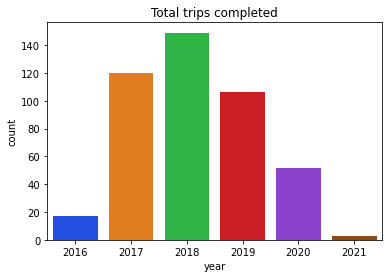

In [69]:
#trips completed in past
print('Total trips: ', completed_rides.Trip_or_Order_Status .count())
print(completed_rides.year.value_counts().sort_index(ascending=True))
sns.countplot(data=completed_rides, x='year',order=['2016','2017','2018','2019','2020','2021'], palette='bright');
plt.title('Total trips completed')


Total trips:  544
COMPLETED          81.6
CANCELED           16.0
DRIVER_CANCELED     1.8
UNFULFILLED         0.6
Name: Trip_or_Order_Status, dtype: float64


Text(0.5, 1.0, 'Order status')

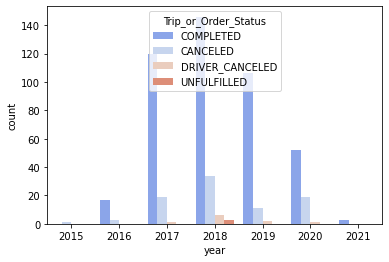

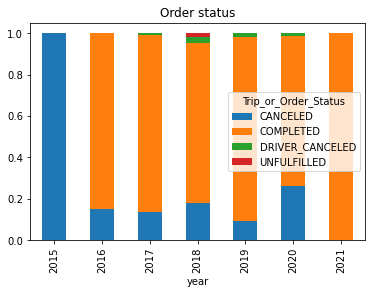

In [70]:
#trips were completed or canceled?
print('Total trips: ', dataset.Trip_or_Order_Status.count())
print(round(dataset.Trip_or_Order_Status.value_counts()/dataset.Trip_or_Order_Status.size*100,1))
sns.countplot(data=dataset, x='year', order=['2015','2016','2017','2018','2019','2020','2021'], hue='Trip_or_Order_Status', palette='coolwarm');
dataset.groupby(by=['year'])['Trip_or_Order_Status'].value_counts(normalize=True).unstack('Trip_or_Order_Status').plot.bar(stacked=True);
plt.title("Order status")

In [71]:
#NOT WORKING :(
#most of the layoffs take place?
#plot aheap map which shows maximum visited 
"""
import folium
from folium import plugins
coord=[]

dataset['Dropoff_Lng'].fillna((dataset['Dropoff_Lng'].median), inplace=True)
dataset['Dropoff_Lat'].fillna((dataset['Dropoff_Lat'].median), inplace=True)

print(dataset['Dropoff_Lat'].isnull().sum()) 

for lat,lng in zip(completed_rides.Dropoff_Lat.values,completed_rides.Dropoff_Lng .values):
  coord.append([lat,lng])
map = folium.Map(
    location=[-23.5489,-46.6388],
    tiles='Stamen Terrain',
    zoom_start=7,
    width='80%', 
    height='50%',
    control_scale=True)
#map.add_child(plugins.HeatMap(coord))
map = folium.Map([48, 5], tiles='stamentoner', zoom_start=6)
map.add_child(plugins.HeatMap(coord))
map
"""

"\nimport folium\nfrom folium import plugins\ncoord=[]\n\ndataset['Dropoff_Lng'].fillna((dataset['Dropoff_Lng'].median), inplace=True)\ndataset['Dropoff_Lat'].fillna((dataset['Dropoff_Lat'].median), inplace=True)\n\nprint(dataset['Dropoff_Lat'].isnull().sum()) \n\nfor lat,lng in zip(completed_rides.Dropoff_Lat.values,completed_rides.Dropoff_Lng .values):\n  coord.append([lat,lng])\nmap = folium.Map(\n    location=[-23.5489,-46.6388],\n    tiles='Stamen Terrain',\n    zoom_start=7,\n    width='80%', \n    height='50%',\n    control_scale=True)\n#map.add_child(plugins.HeatMap(coord))\nmap = folium.Map([48, 5], tiles='stamentoner', zoom_start=6)\nmap.add_child(plugins.HeatMap(coord))\nmap\n"

       Product_Type     %
UberX           401  89.7
Pool             39   8.7
Black             4   0.9


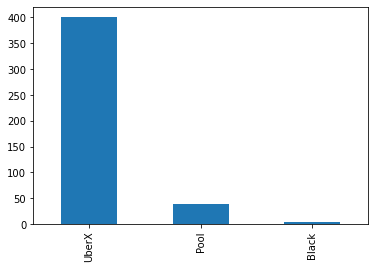

In [72]:
# Creating a serie with product types count
pt_rides = pd.Series(completed_rides.Product_Type.value_counts().sort_index(ascending=False))
# Transforming serie in dataframe
df = pd.DataFrame(pt_rides)
# Including new column with trips portion
df['%'] = (completed_rides.Product_Type.value_counts().sort_index(ascending=False)/completed_rides.Product_Type.size*100).round(1)
#Renaming columns labels
df.rename(columns={'product_type':'Total Rides'}, inplace=True)
print(df)
# Plotting product types count
completed_rides['Product_Type'].value_counts().plot(kind='bar');

In [73]:
completed_rides.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 447 entries, 0 to 551
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   City                  447 non-null    int64         
 1   Product_Type          444 non-null    object        
 2   Trip_or_Order_Status  447 non-null    object        
 3   Request_Time          447 non-null    datetime64[ns]
 4   Begin_Trip_Time       447 non-null    datetime64[ns]
 5   Begin_Trip_Lat        444 non-null    float64       
 6   Begin_Trip_Lng        444 non-null    float64       
 7   Dropoff_Time          447 non-null    datetime64[ns]
 8   Dropoff_Lat           444 non-null    float64       
 9   Dropoff_Lng           444 non-null    float64       
 10  Distance              447 non-null    float64       
 11  Fare_Amount           447 non-null    float64       
 12  Fare_Currency         444 non-null    object        
 13  year                

In [74]:
#how much is the fare, distance, amount, and time spent on the ride?
completed_rides['trip_duration']=completed_rides['Dropoff_Time']-completed_rides['Begin_Trip_Time']
print('Avg. fare:', round(completed_rides.Fare_Amount.mean(),1),'BRL')
print('Avg. distance:',round(completed_rides.distance_km.mean(),1),'km')
print('Avg. fare/km:',round(completed_rides.Fare_Amount.sum()/completed_rides.distance_km.sum(),1),'BRL/km')
print('Avg. time spent on trips:',round(completed_rides.trip_duration.mean(),1),'minutes')
print('')
print('Total fare amount:', round(completed_rides.Fare_Amount.sum(),1),'BRL')
print('Total distance:',round(completed_rides.distance_km.sum(),1),'km')
print('Total time spent on trips:',round(completed_rides.trip_duration.sum()/60,1),'hours')

Avg. fare: 19.1 BRL
Avg. distance: 8.0 km
Avg. fare/km: 2.4 BRL/km


C:\Users\admin\AppData\Local\Temp/ipykernel_16008/306782168.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  completed_rides['trip_duration']=completed_rides['Dropoff_Time']-completed_rides['Begin_Trip_Time']


TypeError: type Timedelta doesn't define __round__ method

In [ ]:
#Which days of the week have the highest number of rides per kilometer?
#overlapping pivot tables to get weighted average
amount_table = completed_rides.pivot_table(values='Fare_Amount',aggfunc='sum',columns='weekday', index='year').round(1)
column_order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
amount_table = amount_table.reindex(column_order, axis=1)
distance_table = completed_rides.pivot_table(values='distance_km',aggfunc='sum',columns='weekday', index='year').round(1)
distance_table = distance_table.reindex(column_order, axis=1)
(amount_table/distance_table).round(1)

In [ ]:
aux_serie = round((completed_rides.groupby('weekday')['Fare_Amount'].sum()/completed_rides.groupby('weekday')['distance_km'].sum()),2)                                                                                                                              
amount_km_df = pd.DataFrame(aux_serie)
amount_km_df = amount_km_df.reset_index()
amount_km_df.rename(columns={'weekday':'weekday',0:'values'},inplace=True)
sns.catplot(x='weekday', y='values', data=amount_km_df, kind='bar', height=4, aspect=3, order=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'],palette='magma');

In [ ]:
rides_amount_km = completed_rides[completed_rides.amount_km==completed_rides.amount_km.max()]
rides_amount_km = rides_amount_km.append(completed_rides[completed_rides.amount_km==completed_rides.amount_km.min()])
rides_amount_km

In [ ]:
#average lead time before requesting a trip?
#seems incorrect!
print(round(completed_rides.request_lead_time.mean(),1),'minutes')

In [ ]:
#to find maximum frequency rides
#print(dataset)
dataset.info()

In [ ]:
data_clustering=dataset[['Dropoff_Lat','Dropoff_Lng']]#,
data_clustering.isnull().sum()
data_clustering.fillna(data_clustering.median(),inplace=True)
print("***")
data_clustering.isnull().sum()

In [75]:
from sklearn.cluster import KMeans

But visualizing the data alone cannot always give the right answer. Hence we demonstrate the following steps.
We now define the following:-

Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used.


Inertia: It is the sum of squared distances of samples to their closest cluster center.

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Window

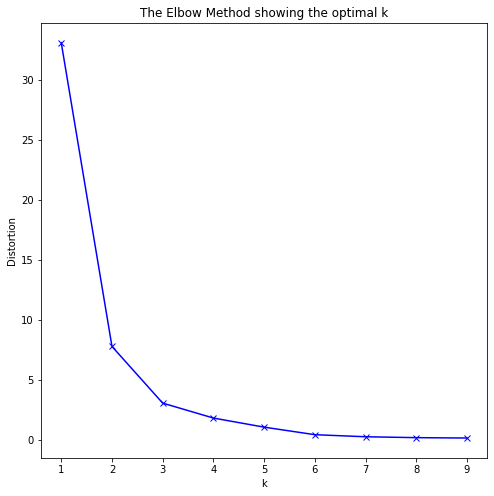

In [76]:
#to find number of clusters
distortions=[]
K=range(1,10)
for k in K :
  kmeanModel=KMeans(n_clusters=k)
  kmeanModel.fit(data_clustering)
  distortions.append(kmeanModel.inertia_)
plt.figure(figsize=(8,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()


In [77]:
#hence we find that suitable number of cluster is 3
kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
label=kmeans.fit_predict(data_clustering)
print(kmeans.cluster_centers_)

C:\Users\admin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


[[-23.57007549 -46.63466303]
 [-22.90257745 -43.12452045]
 [-23.46812375 -45.09692325]]


Centroids : [[-23.57007549 -46.63466303]
 [-22.90257745 -43.12452045]
 [-23.46812375 -45.09692325]]


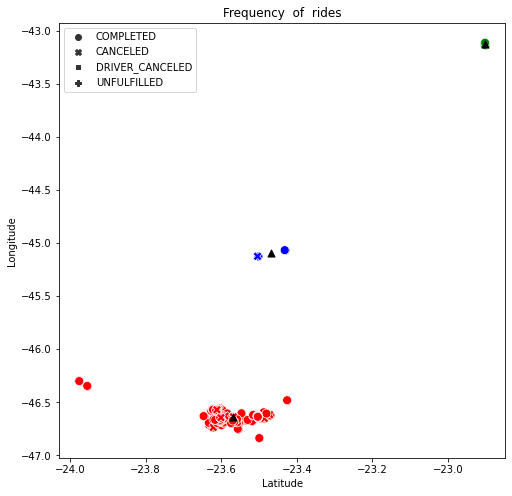

In [78]:
#plotting clusters
plt.figure(figsize=(8,8))
clustered_0=data_clustering[label == 0]
clustered_1=data_clustering[label==1]
clustered_2=data_clustering[label==2]

plt.scatter(clustered_0['Dropoff_Lat'], clustered_0['Dropoff_Lng'] , color = 'red',s=50)
plt.scatter(clustered_1['Dropoff_Lat'] , clustered_1['Dropoff_Lng'] , color = 'green',s=50)
plt.scatter(clustered_2['Dropoff_Lat'] , clustered_2['Dropoff_Lng'] , color = 'blue',s=50)

sns.scatterplot(data=data_clustering, x=clustered_0['Dropoff_Lat'], y=clustered_0['Dropoff_Lng'], style=dataset['Trip_or_Order_Status'],s=80,color="red")
sns.scatterplot(data=data_clustering, x=clustered_1['Dropoff_Lat'], y=clustered_1['Dropoff_Lng'], style=dataset['Trip_or_Order_Status'],s=80,color='green')
sns.scatterplot(data=data_clustering, x=clustered_2['Dropoff_Lat'], y=clustered_2['Dropoff_Lng'], style=dataset['Trip_or_Order_Status'],s=80,color='blue')

#plotting cluster centroids
centroids = kmeans.cluster_centers_
 
#plotting the results:

plt.scatter(centroids[:,0] , centroids[:,1] ,marker='^', s = 50, color = 'black')
#plt.legend(custom, ['Diesel','Petrol','CNG','Hybrid','Electric','CNG + Petrol'], loc='lower right')

handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.title("Frequency  of  rides")
plt.xlabel("Latitude")
plt.ylabel("Longitude")
print("Centroids :",centroids)
plt.show()


In [79]:
dataset.info

<bound method DataFrame.info of      City Product_Type Trip_or_Order_Status        Request_Time  \
0     458        Black            COMPLETED 2021-01-13 22:06:46   
1     458        UberX            COMPLETED 2021-01-13 20:21:05   
2     458        UberX            COMPLETED 2021-01-03 00:23:22   
3     458        UberX            COMPLETED 2020-12-11 23:16:33   
4     458        UberX            COMPLETED 2020-12-11 00:35:46   
..    ...          ...                  ...                 ...   
549   458         Pool            COMPLETED 2016-06-22 11:07:02   
550   458        UberX            COMPLETED 2016-04-07 00:30:46   
551   458        UberX            COMPLETED 2016-04-06 21:16:52   
552   458        UberX             CANCELED 2016-04-06 21:12:03   
553   458        UberX             CANCELED 2015-12-17 23:52:50   

        Begin_Trip_Time  Begin_Trip_Lat  Begin_Trip_Lng        Dropoff_Time  \
0   2021-01-13 22:11:10      -23.599752      -46.715954 2021-01-13 22:29:13   
1   2

In [80]:
#Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st
from sklearn.model_selection import train_test_split

Slope =  1.7337373095547164


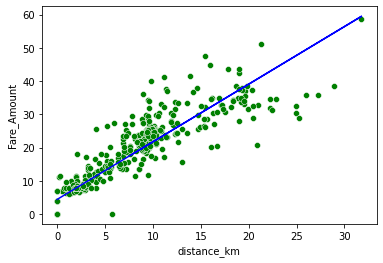

In [81]:
def l_regression(x,y):
#splitting the data
  x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =
0.3, random_state = 0)
x = dataset['distance_km']
y = dataset['Fare_Amount']

sum_x = sum(x)
sum_xx = sum(x*x)
sum_y = sum(y)
sum_xy = sum(x*y)
n = x.count()
mean_x = sum_x/n
mean_y = sum_y/n
m = (n*sum_xy - (sum_x*sum_y)) / (n*sum_xx - (sum_x)*(sum_x))
b = mean_y - m*mean_x
y1 = m*x + b
print("Slope = ",m)
plt.plot(x, y1, color = "b")

sns.scatterplot(x = dataset['distance_km'], y = dataset['Fare_Amount'], data = dataset,
color = "green")
x = dataset.iloc[:, :1].values.reshape(-1, 1)
y = dataset.iloc[:, 1].values.reshape(-1, 1)
l_regression(x,y)

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [83]:
x = dataset['distance_km']
y = dataset['Fare_Amount']
x.fillna(x.median(),inplace=True)
y.fillna(y.median(),inplace=True)
x=x.values.reshape(-1,1)
y=y.values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size =0.3, random_state = 0)
regressor = LinearRegression()  
regressor.fit(x_train, y_train) #training the algorithm

y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,12.90,11.854052
1,7.89,7.792436
2,25.25,20.688934
3,20.07,19.994640
4,25.21,21.782446
...,...,...
159,23.79,24.021541
160,0.00,4.459828
161,28.79,48.252377
162,25.30,21.001366


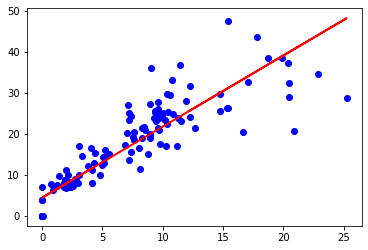

Mean Absolute Error: 3.2682855242976


In [84]:
plt.scatter(x_test, y_test,  color='blue')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  

In [85]:

#testing regression 
X=np.array([[5]])
y_pred = regressor.predict(X)
y_pred

array([[13.13849425]])

In [86]:
import pickle

In [90]:
data={'model': regressor}
with open("uber_saved.pkl","wb") as file :
  pickle.dump(data,file)

In [91]:
with open("uber_saved.pkl","rb") as file :
  data=pickle.load(file)
regressor=data['model']
y_pred = regressor.predict(X)
y_pred

array([[13.13849425]])